In [13]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

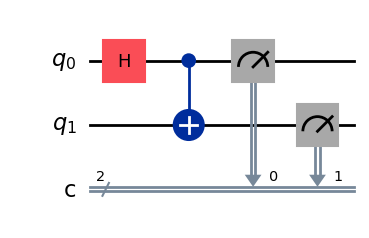

In [14]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0, 1], [0, 1])
display(circuit.draw("mpl"))

In [15]:
backend_sim = AerSimulator()
sampler_sim = BackendSamplerV2(backend=backend_sim)

target = backend_sim.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

sample = 500;
qc_isa = pm.run(circuit)
job = sampler_sim.run([qc_isa],shots=sample)

res = job.result()

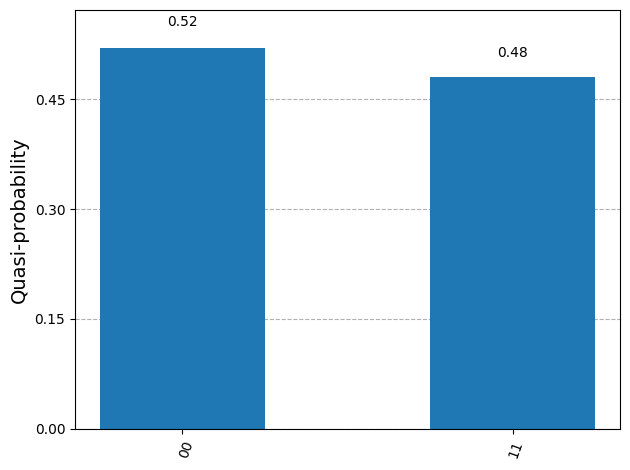

In [ ]:
statistics = res[0].data.c.get_counts()

for key in statistics:
    statistics[key] = float(statistics[key]) / sample
display(plot_histogram(statistics))

In [ ]:
circuit2 = QuantumCircuit(2)
circuit2.h(0)
circuit2.cx(0,1)

ket00 = Statevector([1, 0, 0, 0])
v = ket00.evolve(circuit2)

display(v.draw("latex"))

<IPython.core.display.Latex object>